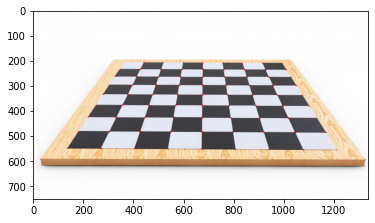

In [8]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
filename = 'chessboard.jpeg'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]

rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_img)
plt.show()

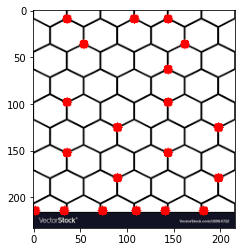

In [9]:
import numpy as np
import cv2

# Read the image and convert to greyscale
img = cv2.imread('cells.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Find the top 20 corners using the cv2.goodFeaturesToTrack()
corners = cv2.goodFeaturesToTrack(gray,20,0.01,10)
corners = np.int0(corners)

# Iterate over the corners and draw a circle at that location
for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),5,(0,0,255),-1)
    
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_img)
plt.show()

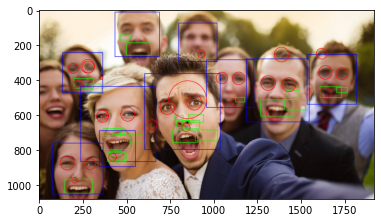

In [4]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
mouth_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

img = cv2.imread('people.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        # Draw a rectangle around the faces
    roi_gray_mouth = gray[y+(int(h/2)):y+h, x:x+w]
    roi_color_mouth = img[y+(int(h/2)):y+h, x:x+w]
    
    roi_gray_eye = gray[y-(int(h/2)):y+h, x:x+w]
    roi_color_eye = img[y-(int(h/2)):y+h, x:x+w]

    mouth = mouth_cascade.detectMultiScale(roi_gray_mouth)
    eyes = eye_cascade.detectMultiScale(roi_gray_eye)
    for (ex,ey,ew,eh) in mouth:
        cv2.rectangle(roi_color_mouth, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

    for (eex,eey,eew,eeh) in eyes:
        d = int(eew / 2)
        cv2.circle(roi_color_eye, (int(eex + eew / 4) + int(d / 2), int(eey + eeh / 4) + int(d / 2)), int(d) ,(0,0,255),2)

rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(rgb_img)
plt.show()

In [1]:
import cv2
import sys

mouthCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
video_capture = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    mouth = mouthCascade.detectMultiScale(gray, 1.3, 5)
    faces = faceCascade.detectMultiScale(
                gray,
                scaleFactor=1.1,
                minNeighbors=5,
                minSize=(30, 30)
            )
            # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
            # Draw a rectangle around the faces
        roi_gray_mouth = gray[y+(int(h/2)):y+h, x:x+w]
        roi_color_mouth = frame[y+(int(h/2)):y+h, x:x+w]

        roi_gray_eye = gray[y-(int(h/2)):y+h, x:x+w]
        roi_color_eye = frame[y-(int(h/2)):y+h, x:x+w]

        mouth = mouthCascade.detectMultiScale(roi_gray_mouth)
        eyes = eyeCascade.detectMultiScale(roi_gray_eye)
        for (ex,ey,ew,eh) in mouth:
            cv2.rectangle(roi_color_mouth, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

        for (eex,eey,eew,eeh) in eyes:
            d = int(eew / 2)
            cv2.circle(roi_color_eye, (int(eex + eew / 4) + int(d / 2), int(eey + eeh / 4) + int(d / 2)), int(d) ,(0,0,255),2)

    # Display the resulting frame
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()